# Import Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Getting dataset from drive

https://drive.google.com/file/d/1cSXNq-XFABsVMdfsa1egHePc8y26CFOF/view?usp=sharing

In [37]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Read csv File

In [38]:
df = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Statistical details of the dataset

In [9]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [35]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Divide the data into independent and dependent Variables

#### Dependent and Independent variables

In [11]:
data = df.loc[:,["Temperature (C)","Apparent Temperature (C)"]]
data.head(5)

,Temperature (C),Apparent Temperature (C)
0,9.472222,7.388889
1,9.355556,7.227778
2,9.377778,9.377778
3,8.288889,5.944444
4,8.755556,6.977778


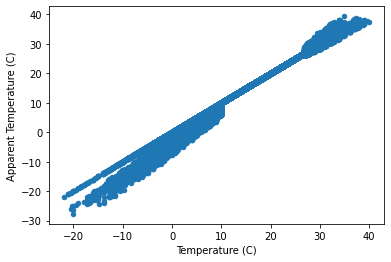

In [30]:
df.plot(kind = 'scatter' , x ='Temperature (C)' ,y = 'Apparent Temperature (C)')

#### Independent Variable:

In [39]:
X = df["Temperature (C)"].values
X

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

#### Dependent Variable:

In [13]:
Y = df["Apparent Temperature (C)"].values
Y

array([ 7.38888889,  7.22777778,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

### Split 80% of the data to the training set while 20% of the data to test set

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, test_size = 0.2, random_state = 0)

# Reshape the train and test sets

In [47]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)


# Create a model and fit it (Train the algorithm)

In [48]:
from sklearn.linear_model import LinearRegression
# load the data to the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

# Retrieve the intercept

In [49]:
print(model.intercept_)

[-2.41617514]


# Retrieve the slope

In [50]:
print(model.coef_)

[[1.11197025]]


# Predict the output based on the regression model 

In [51]:
y_predict = model.predict(x_test)
y_predict

array([[13.62090696],
       [11.10044105],
       [24.22786766],
       ...,
       [-3.5281454 ],
       [ 5.73209577],
       [15.44330265]])

In [55]:
x_test

array([[14.42222222],
       [12.15555556],
       [23.96111111],
       ...,
       [-1.        ],
       [ 7.32777778],
       [16.06111111]])

In [56]:
train_accuracy = model.score(x_train, y_train)
train_accuracy

0.9853454463129298

In [57]:
test_accuracy = model.score(x_test, y_test)
test_accuracy

0.9851730033596017

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict,y_test)

1.6820729326083672

In [71]:
new_data = np.array([12,10,7,8,9,13,4,6,7.2,5.5,8.9]).reshape(-1,1)
new_data

array([[12. ],
       [10. ],
       [ 7. ],
       [ 8. ],
       [ 9. ],
       [13. ],
       [ 4. ],
       [ 6. ],
       [ 7.2],
       [ 5.5],
       [ 8.9]])

In [72]:
new_pred=model.predict(new_data)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_pred,new_data)

2.3163183732672477

y_test = Actual value of target from dataset. 

y_predict = The value our model predicted.

x_test = Input feature from dataset.

# Apparent Temperature Data Plot

Text(0.5, 1.0, 'Apparent Temperature Data')

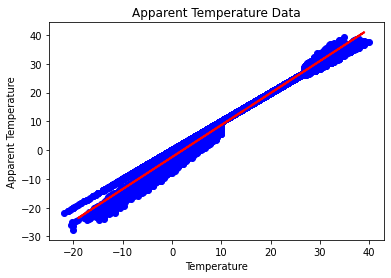

In [67]:
plt.scatter(X,Y, color = "blue")
plt.plot(x_test, y_predict, color='red', linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')
plt.title('Apparent Temperature Data')

# Actual Data vs Predicted Data Plot

Text(0.5, 1.0, 'Actual Data vs Predicted Data')

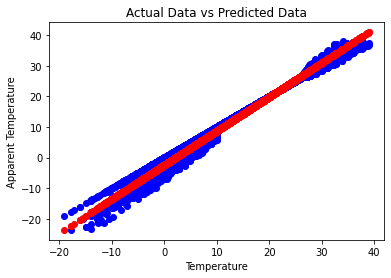

In [70]:
plt.scatter(x_test,y_test, color = "blue")
plt.scatter(x_test,y_predict, color = "red")

plt.xlabel('Temperature')
plt.ylabel('Apparent Temperature')
plt.title('Actual Data vs Predicted Data')

### Standard deviation for Temperature

In [26]:
X.std()

9.551496806535758

### Standard deviation for Apparent Temperature

In [27]:
Y.std()

10.69679194088845